In [416]:
# built-in modules
import csv
import math
from collections import namedtuple
from statistics import mean
from pathlib import Path

# import third-parties
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML



%matplotlib inline

display(HTML("<style>.container { width:80% !important; }</style>"))

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

DATA_DIR = Path('../Data')

## Data Process

In [410]:
# Create a special namedtuple for each row of data.
fields = [
    "repo", "size", "archive_time", "archive_size", "gzip_time", "gzip_size",
    "bzip2_time", "bzip2_size", "xz_time", "xz_size", "zip_time", "zip_size"
]
row = namedtuple('Row', fields)

In [413]:
# Read the raw data and convert it to csv.
rows = list()

def get_average(numbers):
    return round(mean(float(n[: -1]) for n in numbers), 3)
        
with open(DATA_DIR / 'compression.csv') as raw_data:
    for line in raw_data:
        line = line.strip().split(' ')
        name = line[0]
        size= line[1]
        
        archive_seconds = get_average(line[2: 5])
        archive_size = line[5]
        
        gzip_seconds = get_average(line[6: 9])
        gzip_size = line[9]
        
                
        bzip2_seconds = get_average(line[10: 13])
        bzip2_size = line[13]
                        
        xz_seconds = get_average(line[14: 17])
        xz_size = line[17]
        
                                
        zip_seconds = get_average(line[18: 21])
        zip_size = line[21]
        
        rows.append(
            row(
                name, size, archive_seconds, archive_size, gzip_seconds, gzip_size,
                bzip2_seconds, bzip2_size, xz_seconds, xz_size, zip_seconds, zip_size
            )
        ) 

### Save the data into csv file.

In [420]:
with open(DATA_DIR / 'clean_comression.csv', 'wt') as csv_file:
    csv_writer = csv.DictWriter(csv_file, row._fields)
    
    csv_writer.writeheader()
    
    csv_writer.writerows([(r._asdict()) for r in rows])

## Data visualization

In [421]:
data = pd.read_csv(DATA_DIR / 'clean_comression.csv', index_col='repo')

In [422]:
data.head()

,size,archive_time,archive_size,gzip_time,gzip_size,bzip2_time,bzip2_size,xz_time,xz_size,zip_time,zip_size
repo,,,,,,,,,,,
alstore,48M,0.025,48M,1.212,45M,1.210,45M,13.226,44M,1.187,45M
andrewng,372M,0.178,371M,10.138,359M,10.102,359M,109.858,348M,9.721,359M
bandersnatch,1.5M,0.002,1.2M,0.030,796K,0.030,796K,0.220,752K,0.029,832K
chiaki,5.6M,0.004,5.0M,0.126,3.7M,0.125,3.7M,0.987,3.4M,0.124,3.8M
codesearch,136M,0.065,135M,3.754,58M,3.797,58M,51.398,49M,3.934,59M


### convert different sizes to MB.

In [423]:
## Convert all the size to mega bytes
convert_times = {
    'K': 1,
    'M': 2,
    'G': 3,
}
def normalize_disk_size(value):
    last_char = value[-1]
    times = convert_times[last_char]
    size_in_bytes = float(value[: -1]) * math.pow(1024, times)
    return bytes_to_mg(size_in_bytes)
    
def bytes_to_mg(bytes):
    bsize = 1024
    r = float(bytes)
    for i in range(2):
        r = r / bsize
    return round(r, 1)

columns = ('size', 'archive_size', 'gzip_size', 'bzip2_size', 'xz_size', 'zip_size')
for c in columns:
    data[c] = data[c].apply(normalize_disk_size)

In [424]:
data = data.sort_values(by='size', ascending=True)

In [425]:
data

,size,archive_time,archive_size,gzip_time,gzip_size,bzip2_time,bzip2_size,xz_time,xz_size,zip_time,zip_size
repo,,,,,,,,,,,
gospring,0.6,0.001,0.4,0.010,0.2,0.010,0.2,0.071,0.2,0.009,0.3
bandersnatch,1.5,0.002,1.2,0.030,0.8,0.030,0.8,0.220,0.7,0.029,0.8
pipx,3.2,0.003,3.0,0.076,2.8,0.076,2.8,0.594,2.7,0.073,2.8
ipwndfu,3.8,0.003,3.2,0.079,2.7,0.079,2.7,0.548,1.7,0.073,2.7
chiaki,5.6,0.004,5.0,0.126,3.7,0.125,3.7,0.987,3.4,0.124,3.8
thefuck,6.0,0.004,5.1,0.130,4.2,0.132,4.2,1.113,3.9,0.135,4.3
imgui,6.4,0.004,5.8,0.159,2.5,0.159,2.5,1.572,2.1,0.160,2.5
transformers,8.8,0.006,8.3,0.217,5.8,0.215,5.8,1.963,5.4,0.216,6.0
pyenv,8.9,0.007,7.0,0.165,4.2,0.167,4.2,1.388,3.6,0.176,4.5


### Repositories by Size (MB)

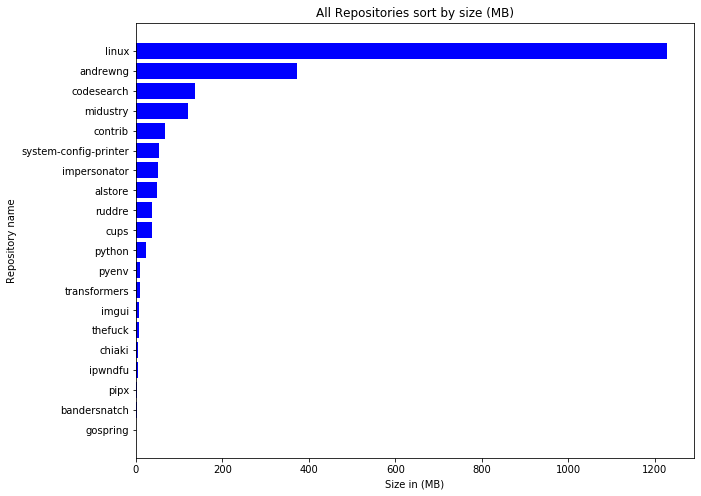

In [426]:
# Data
repos = list(data.index)
sizes = list(data['size'].values)

plt.barh(data.index, sizes, color='b')

plt.title('All Repositories sort by size (MB)')

plt.xlabel('Size in (MB)')
plt.ylabel('Repository name')

plt.savefig('repo-size.png')

plt.show()

### The most time consuming algorithms is ...

In [428]:
data[['archive_time', 'gzip_time', 'bzip2_time', 'xz_time', 'zip_time']].sum()

archive_time      1.353
gzip_time        51.190
bzip2_time       52.289
xz_time         642.387
zip_time         49.031
dtype: float64

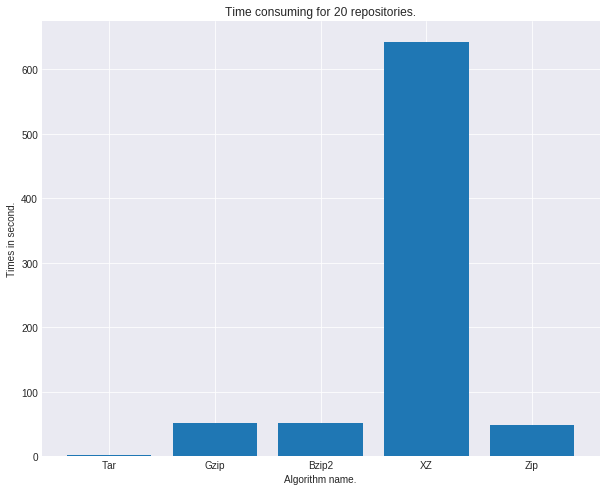

In [429]:
## accumulative times

algorithms_x = ['Tar', 'Gzip', 'Bzip2', 'XZ', 'Zip']
times_y = [1.353, 51.190, 52.289, 642.387, 49.031]

plt.style.use('seaborn-darkgrid')
plt.bar(algorithms_x, times_y)


plt.xlabel('Algorithm name.')
plt.ylabel('Times in second.')


plt.title('Time consuming for 20 repositories.')

plt.show()

### Compression Time

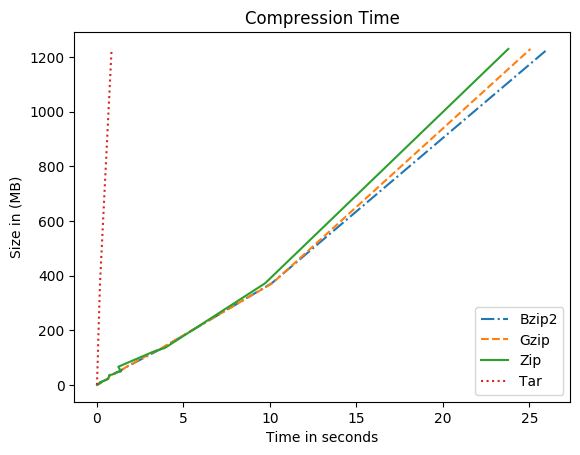

In [430]:
# Data
archive_time = list(data.archive_time.values)
gzip_time = list(data.gzip_time.values)
bzip2_time = list(data.bzip2_time.values)
xz_time = list(data.xz_time.values)
zip_time = list(data.zip_time.values)

plt.style.use('default')

plt.title('Compression Time')

plt.ylabel('Size in (MB)')
plt.xlabel('Time in seconds')

#plt.plot(xz_time, sizes, label='XZ')
plt.plot(bzip2_time, sizes, label='Bzip2', linestyle='-.')
plt.plot(gzip_time, sizes, label='Gzip', linestyle='--')
plt.plot(zip_time, sizes, label='Zip')
plt.plot(archive_time, sizes, label='Tar', linestyle=':')


plt.legend()

plt.show()


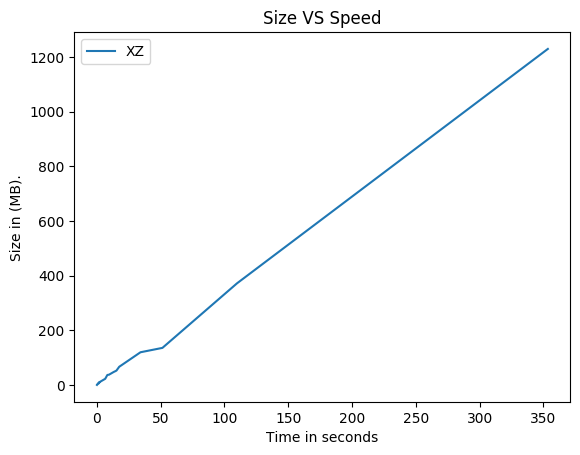

In [431]:
# Data
xz_time = list(data.xz_time.values)


plt.style.use('default')

plt.title('Size VS Speed')

plt.ylabel('Size in (MB).')
plt.xlabel('Time in seconds')

plt.plot(xz_time, sizes, label='XZ')

plt.legend()

plt.show()

### Compression Ratio

In [527]:
def calculate_compression_ratio(name, row):
    """
    Technically this is space savings:
    (1 - (compressed_size - uncompressed_size)) * 100
    Visit wikipedia page for more information:
    https://en.wikipedia.org/wiki/Data_compression_ratio
    """
    
    return round((1 - (row[name] / row['size'])) * 100, 2)

from functools import partial

gzip_compression = partial(calculate_compression_ratio, 'gzip_size')
xz_compression = partial(calculate_compression_ratio, 'xz_size')
bzip2_compression = partial(calculate_compression_ratio, 'bzip2_size')
zip_compression = partial(calculate_compression_ratio, 'zip_size')
tar_compression = partial(calculate_compression_ratio, 'archive_size')

# Custom ones
best_gzip_compression = partial(calculate_compression_ratio, 'best_gzip_size')
best_zip_compression = partial(calculate_compression_ratio, 'best_zip_size')

In [433]:
data['zip_ratio'] = data.apply(zip_compression, axis=1)
data['gzip_ratio'] = data.apply(gzip_compression, axis=1)
data['xz_ratio'] = data.apply(xz_compression, axis=1)
data['bzip2_ratio'] = data.apply(bzip2_compression, axis=1)
data['tar_ratio'] = data.apply(tar_compression, axis=1)

In [434]:
data

,size,archive_time,archive_size,gzip_time,gzip_size,bzip2_time,bzip2_size,xz_time,xz_size,zip_time,zip_size,zip_ratio,gzip_ratio,xz_ratio,bzip2_ratio,tar_ratio
repo,,,,,,,,,,,,,,,,
gospring,0.6,0.001,0.4,0.010,0.2,0.010,0.2,0.071,0.2,0.009,0.3,50.00,66.67,66.67,66.67,33.33
bandersnatch,1.5,0.002,1.2,0.030,0.8,0.030,0.8,0.220,0.7,0.029,0.8,46.67,46.67,53.33,46.67,20.00
pipx,3.2,0.003,3.0,0.076,2.8,0.076,2.8,0.594,2.7,0.073,2.8,12.50,12.50,15.62,12.50,6.25
ipwndfu,3.8,0.003,3.2,0.079,2.7,0.079,2.7,0.548,1.7,0.073,2.7,28.95,28.95,55.26,28.95,15.79
chiaki,5.6,0.004,5.0,0.126,3.7,0.125,3.7,0.987,3.4,0.124,3.8,32.14,33.93,39.29,33.93,10.71
thefuck,6.0,0.004,5.1,0.130,4.2,0.132,4.2,1.113,3.9,0.135,4.3,28.33,30.00,35.00,30.00,15.00
imgui,6.4,0.004,5.8,0.159,2.5,0.159,2.5,1.572,2.1,0.160,2.5,60.94,60.94,67.19,60.94,9.38
transformers,8.8,0.006,8.3,0.217,5.8,0.215,5.8,1.963,5.4,0.216,6.0,31.82,34.09,38.64,34.09,5.68
pyenv,8.9,0.007,7.0,0.165,4.2,0.167,4.2,1.388,3.6,0.176,4.5,49.44,52.81,59.55,52.81,21.35


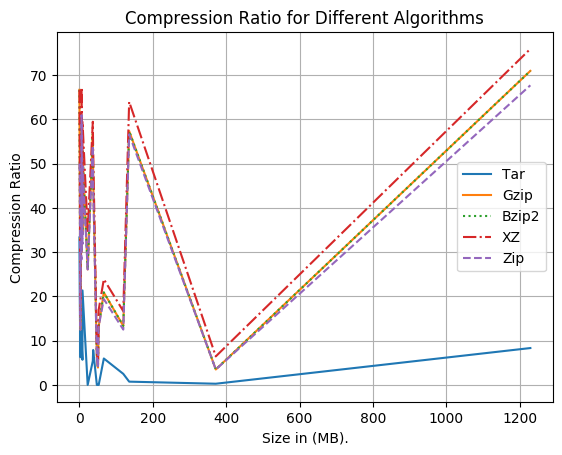

In [459]:
plt.plot(sizes, data.tar_ratio.values, label='Tar')

plt.plot(sizes, data.gzip_ratio.values, label='Gzip')

plt.plot(sizes, data.bzip2_ratio.values, label='Bzip2', linestyle=':')

plt.plot(sizes, data.xz_ratio.values, label='XZ', linestyle='-.')

plt.plot(sizes, data.zip_ratio.values, label='Zip', linestyle='--')

plt.style.use('default')

plt.title('Compression Ratio for Different Algorithms')

plt.xlabel('Size in (MB).')
plt.ylabel('Compression Ratio')

plt.legend()
# plt.tight_layout()
plt.grid()
plt.show()

### Mean Ratio for each algorithms

In [455]:
mean_ratio_y = list(data[['tar_ratio', 'gzip_ratio', 'bzip2_ratio', 'xz_ratio', 'zip_ratio']].mean())

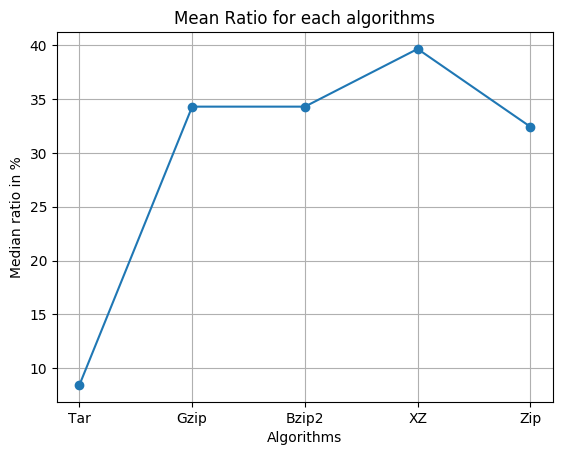

In [458]:
plt.plot(algorithms_x, mean_ratio_y, marker='o')
plt.title('Mean Ratio for each algorithms')

plt.xlabel('Algorithms')
plt.ylabel('Median ratio in %')

plt.grid()

plt.show()

## How about deepest compression for gzip and zip programs.

In [460]:
# Create a special namedtuple for each row of data.
custom_fields = ["repo", "size", "gzip_time", "gzip_size","zip_time", "zip_size"]
custom_row = namedtuple('Row', custom_fields)

In [461]:
# Read the raw data and convert it to csv.
rows = list()

def get_average(numbers):
    return round(mean(float(n[: -1]) for n in numbers), 3)
        
with open('Data/custom.ssv') as ssv_data:
    for line in ssv_data:
        line = line.strip().split(' ')
        name = line[0]
        size= line[1]
        
        gzip_seconds = get_average(line[2: 5])
        gzip_size = line[5]
                                        
        zip_seconds = get_average(line[6: 9])
        zip_size = line[9]
        rows.append(custom_row(name, size, gzip_seconds, gzip_size,zip_seconds, zip_size)) 

### Save the data into csv file.

In [462]:
with open('Data/custom.csv', 'wt') as csv_file:
    csv_writer = csv.DictWriter(csv_file, custom_row._fields)
    
    csv_writer.writeheader()
    
    csv_writer.writerows([(r._asdict()) for r in rows])

In [478]:
custom_data = pd.read_csv(DATA_DIR / 'custom.csv', index_col='repo')

In [479]:
for item in ('size', 'gzip_size', 'zip_size'):
    custom_data[item] = custom_data[item].apply(normalize_disk_size)

In [492]:
custom_data = custom_data.sort_values(by='size')

In [491]:
# rename columns
custom_data.columns = ['size', 'best_gzip_time', 'best_gzip_size', 'best_zip_time', 'best_zip_size']

In [488]:
custom_data.gzip_size.sum()

3557.6000000000004

In [497]:
custom_data.head()

,size,best_gzip_time,best_gzip_size,best_zip_time,best_zip_size
repo,,,,,
gospring,0.6,0.015,0.2,0.010,0.3
bandersnatch,1.5,0.047,0.8,0.031,0.8
pipx,3.2,0.086,2.8,0.074,2.8
ipwndfu,3.8,0.106,2.7,0.081,2.7
chiaki,5.6,0.159,3.7,0.134,3.8


In [498]:
data.head()

,size,archive_time,archive_size,gzip_time,gzip_size,bzip2_time,bzip2_size,xz_time,xz_size,zip_time,zip_size,zip_ratio,gzip_ratio,xz_ratio,bzip2_ratio,tar_ratio
repo,,,,,,,,,,,,,,,,
gospring,0.6,0.001,0.4,0.010,0.2,0.010,0.2,0.071,0.2,0.009,0.3,50.00,66.67,66.67,66.67,33.33
bandersnatch,1.5,0.002,1.2,0.030,0.8,0.030,0.8,0.220,0.7,0.029,0.8,46.67,46.67,53.33,46.67,20.00
pipx,3.2,0.003,3.0,0.076,2.8,0.076,2.8,0.594,2.7,0.073,2.8,12.50,12.50,15.62,12.50,6.25
ipwndfu,3.8,0.003,3.2,0.079,2.7,0.079,2.7,0.548,1.7,0.073,2.7,28.95,28.95,55.26,28.95,15.79
chiaki,5.6,0.004,5.0,0.126,3.7,0.125,3.7,0.987,3.4,0.124,3.8,32.14,33.93,39.29,33.93,10.71


## Compare the result

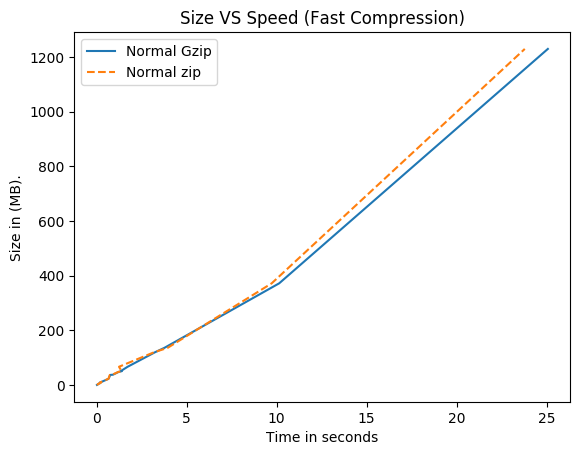

In [519]:

plt.plot(gzip_time, data['size'], label='Normal Gzip')

plt.plot(zip_time, data['size'], label='Normal zip', linestyle='--')

plt.title('Size VS Speed (Fast Compression)')

plt.ylabel('Size in (MB).')
plt.xlabel('Time in seconds')

plt.legend()

plt.show()

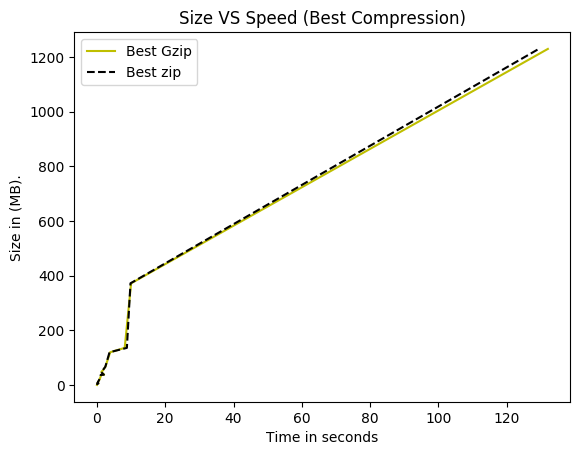

In [516]:
# GZIPs
plt.plot(custom_data.best_gzip_time, data['size'], label='Best Gzip', color='y')

plt.plot(custom_data.best_zip_time, data['size'], label='Best zip', color='k', linestyle='--')

plt.title('Size VS Speed (Best Compression)')

plt.ylabel('Size in (MB).')
plt.xlabel('Time in seconds')

plt.legend()

plt.show()

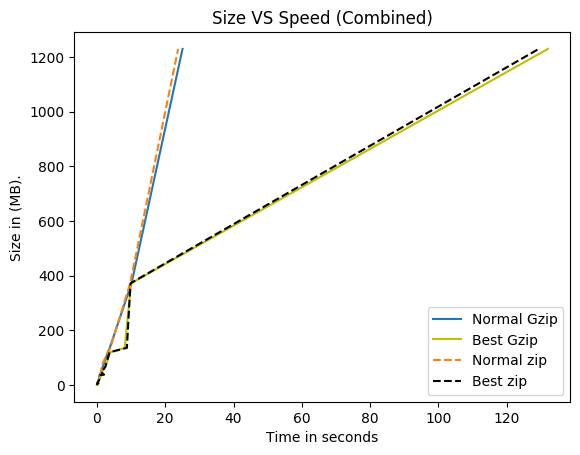

In [518]:
# GZIPs
plt.plot(gzip_time, data['size'], label='Normal Gzip')

plt.plot(custom_data.best_gzip_time, data['size'], label='Best Gzip', color='y')

# ZIPs
plt.plot(zip_time, data['size'], label='Normal zip', linestyle='--')

plt.plot(custom_data.best_zip_time, data['size'], label='Best zip', color='k', linestyle='--')

plt.title('Size VS Speed (Combined)')

plt.ylabel('Size in (MB).')
plt.xlabel('Time in seconds')

plt.legend()

plt.show()

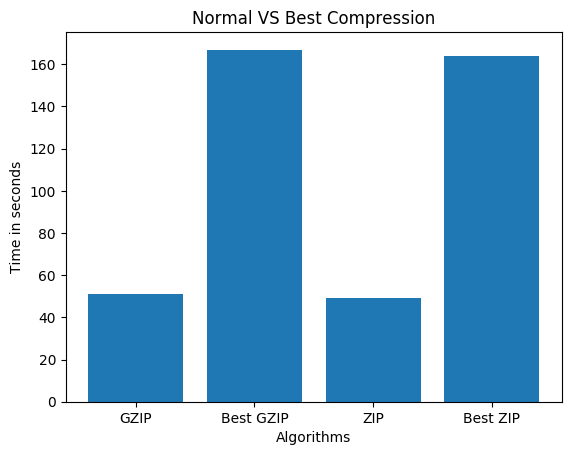

In [544]:
names = ['GZIP', 'Best GZIP', 'ZIP', 'Best ZIP']
numbers = [data.gzip_time.sum(), custom_data.best_gzip_time.sum(), data.zip_time.sum(), custom_data.best_zip_time.sum()]

plt.bar(names, numbers)
plt.title('Normal VS Best Compression')

plt.ylabel('Time in seconds')
plt.xlabel('Algorithms')

plt.show()

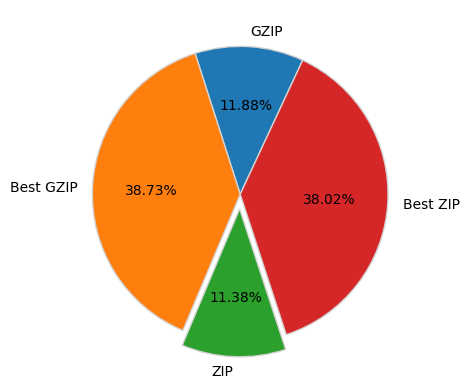

In [571]:
names = ['GZIP', 'Best GZIP', 'ZIP', 'Best ZIP']
labels = [data.gzip_time.sum(), custom_data.best_gzip_time.sum(), data.zip_time.sum(), custom_data.best_zip_time.sum()]
explode = [0, 0, 0.1, 0]

plt.pie(
    numbers,
    labels=names,
    explode=explode,
    autopct='%1.2f%%',
    startangle=65,
    wedgeprops={'edgecolor': 'lightgrey'},
)
plt.show()

* On average, the time consumption increased by **a massive three times**.

### Ratio

In [530]:
custom_data['best_zip_ratio'] = custom_data.apply(best_zip_compression, axis=1)
custom_data['best_gzip_ratio'] = custom_data.apply(best_gzip_compression, axis=1)

In [553]:
custom_data[['size', 'best_gzip_size', 'best_zip_size']].tail()

,size,best_gzip_size,best_zip_size
repo,,,
contrib,67.0,53.0,54.0
midustry,120.0,104.0,105.0
codesearch,136.0,58.0,58.0
andrewng,372.0,359.0,359.0
linux,3891.2,2764.8,2867.2


* We are going to use `zip` as our backend archive program.